In [1]:
import numpy as np
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
import math
import warnings,os
import glob
from scipy.signal import find_peaks
import re
warnings.filterwarnings('ignore')

In [18]:
path="./data/jan_7_data_discretized/train_set/"
folder_list = os.listdir(path)

In [19]:
folder_list

['diagonal_1',
 'diagonal_2',
 'diagonal_3',
 'diagonal_4',
 'diagonal_5',
 'diagonal_6',
 'in_hole_1',
 'in_hole_2',
 'in_hole_3',
 'in_hole_4',
 'in_hole_5',
 'in_hole_6',
 'one_line_1',
 'one_line_2',
 'one_line_3',
 'one_line_4',
 'one_line_5',
 'one_line_6']

Import dataset

In [20]:
file_size=50
def get_data(raw_data):
  data=raw_data.drop(["msg"],axis=1)
  rot_data = data
  return rot_data
# concate all data to single file
for name_idx in range(len(folder_list)):
  df=[]
  for i in range(1,file_size+1):
    material=path+folder_list[name_idx]
    filename="/output_"+str(i)+".csv"
    temp=pd.read_csv(material+filename)
    temp=get_data(temp) # remove the unuse columns
    row_data=[]
    for row in range (len(temp)):
      row_data.append(temp.iloc[row].values)
    row_data=np.array(row_data).reshape((1,-1)).squeeze(axis=0)
    df.append(row_data)
  df=pd.DataFrame(df)
  material=path+folder_list[name_idx]
  df.transpose().to_csv(material+"/all_result.csv")
  print("finish"+folder_list[name_idx])

finishdiagonal_1
finishdiagonal_2
finishdiagonal_3
finishdiagonal_4
finishdiagonal_5
finishdiagonal_6
finishin_hole_1
finishin_hole_2
finishin_hole_3
finishin_hole_4
finishin_hole_5
finishin_hole_6
finishone_line_1
finishone_line_2
finishone_line_3
finishone_line_4
finishone_line_5
finishone_line_6


In [3]:
import random
def print_original_plot(name,path,outlier_delete=False):
  material=path+name
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  # print(df.describe())
  if outlier_delete:
    randomlist = random.sample(range(0, len(df)), 1000)
    for i in randomlist:
      mean = df.iloc[i].mean()
      std = df.iloc[i].std()

      z_scores = (df.iloc[i] - mean) / std

      mask = np.abs(z_scores) > 5
      # print(mask)
      drop_col=[]
      for i in range(len(mask)):
        if mask[i]:
          drop_col.append(df.columns[i])
      df.drop(drop_col,axis=1, inplace=True)
  return df

In [4]:
path="./data/jan_7_data_discretized/train_set/"
folder_list = os.listdir(path)
df_all=pd.DataFrame()
# labellist=['alu_hollow_thick','alu_hollow_thin','alu','brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['alu','brass','printpla','pla','printresin','wood']
# labellist=folder_list
# labellist=['center','edge','middle']
# labellist=['full','stand','point']
# labellist=['1','2']

labellist=['diagonal','one_line','in_hole']
def create_regression(label,folder_name):
  ret=0
  index=['diagonal','one_line','in_hole']
  for i in range(len(index)):
    if(index[i] in label):
      ret=i*100
  match = re.search(r'(\d+)', folder_name)
  number = match.group(0)
  if('in_hole' not in label):
    ret+=int(number)*10
  return ret

for name in folder_list:
  df_temp=print_original_plot(name=name,path=path)
  label=""
  for i in labellist:
    if i in name :
      label=i
      break
  # if ('in_hole' in label and name!='in_hole_1'): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  # df_temp.loc['label']=[create_regression(label,name) for _ in list(df_temp)]
  df_all = pd.concat([df_all, df_temp], axis=1)


diagonal diagonal_1
diagonal diagonal_2
diagonal diagonal_3
diagonal diagonal_4
diagonal diagonal_5
diagonal diagonal_6
in_hole in_hole_1
in_hole in_hole_2
in_hole in_hole_3
in_hole in_hole_4
in_hole in_hole_5
in_hole in_hole_6
one_line one_line_1
one_line one_line_2
one_line one_line_3
one_line one_line_4
one_line one_line_5
one_line one_line_6


In [5]:
df_all2=pd.DataFrame()
path_2="./data/jan_7_data_discretized/test_set/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if ('2' in name ): continue
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i in name :
      label=i
      break
  if (label==''): continue
  # if ('in_hole' in label  and name!='in_hole_1'): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  # df_temp.loc['label']=[create_regression(label,name) for _ in list(df_temp)]
  
  df_all2 = pd.concat([df_all2, df_temp], axis=1,ignore_index=True)

diagonal diagonal_1
diagonal diagonal_2
diagonal diagonal_3
diagonal diagonal_4
diagonal diagonal_5
diagonal diagonal_6
in_hole in_hole_1
in_hole in_hole_2
in_hole in_hole_3
in_hole in_hole_4
in_hole in_hole_5
in_hole in_hole_6
one_line one_line_1
one_line one_line_2
one_line one_line_3
one_line one_line_4
one_line one_line_5
one_line one_line_6


In [6]:
df_all=df_all.dropna(axis=0)
df_all2=df_all2.dropna(axis=0)


In [7]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,34.0,-2.0,10.0,1.0,-8.0,-2.0,8.0,-1.0,8.0,-4.0,...,-4.0,4.0,7.0,2.0,-4.0,26.0,1.0,-7.0,-4.0,-15.0
1,28.0,-6.0,13.0,-3.0,-5.0,-1.0,7.0,-4.0,15.0,-5.0,...,1.0,2.0,10.0,5.0,-6.0,27.0,-2.0,-12.0,-5.0,-13.0
2,30.0,-6.0,9.0,-2.0,-8.0,8.0,8.0,-6.0,11.0,-6.0,...,-4.0,2.0,8.0,2.0,-4.0,35.0,-2.0,-9.0,-2.0,-11.0
3,28.0,-3.0,11.0,0.0,-10.0,9.0,11.0,5.0,13.0,-9.0,...,-8.0,6.0,4.0,1.0,-4.0,32.0,2.0,-7.0,1.0,-8.0
4,27.0,-1.0,9.0,2.0,-7.0,-1.0,4.0,-2.0,11.0,-12.0,...,-2.0,11.0,11.0,5.0,-7.0,33.0,3.0,-11.0,-3.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44028,4.0,78.0,45.0,45.0,23.0,179.0,-200.0,14.0,-85.0,-175.0,...,32.0,3.0,42.0,37.0,13.0,15.0,31.0,-14.0,14.0,6.0
44029,3.0,-69.0,-31.0,-54.0,-33.0,-234.0,128.0,-105.0,1.0,90.0,...,-60.0,-34.0,-29.0,-46.0,-27.0,-14.0,-32.0,20.0,4.0,-17.0
44030,-35.0,71.0,13.0,77.0,60.0,222.0,-20.0,176.0,98.0,-7.0,...,79.0,45.0,30.0,56.0,26.0,-16.0,6.0,-29.0,-1.0,-12.0
44031,37.0,-55.0,4.0,-75.0,-63.0,-228.0,-61.0,-233.0,-170.0,-92.0,...,-89.0,-71.0,-5.0,-52.0,-38.0,20.0,-2.0,32.0,16.0,5.0


In [297]:
df_all2
# print(df_all2.loc['label', 10:20])

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,2,-13,-15,4,-5,36.0,8.0,7.0,-5.0,10.0,...,-65.0,-5.0,-6.0,6.0,-5.0,5.0,-8.0,7.0,-1.0,-11.0
1,14,-13,-14,5,-16,38.0,1.0,4.0,-2.0,5.0,...,-65.0,-5.0,-6.0,-2.0,-8.0,-3.0,-4.0,4.0,-10.0,-6.0
2,10,-11,-16,1,-7,41.0,3.0,3.0,-3.0,9.0,...,-63.0,-5.0,-7.0,5.0,-8.0,7.0,-5.0,-2.0,0.0,-7.0
3,5,-12,-13,7,-10,33.0,4.0,-1.0,1.0,10.0,...,-59.0,-5.0,-10.0,4.0,-12.0,3.0,-6.0,4.0,-8.0,-8.0
4,10,-10,-14,2,-8,36.0,2.0,1.0,1.0,5.0,...,-67.0,-9.0,-5.0,0.0,-10.0,-1.0,-6.0,-1.0,-2.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44028,151,46,212,-141,-208,-97.0,-201.0,-165.0,-170.0,-103.0,...,0.0,-62.0,63.0,-28.0,70.0,55.0,101.0,137.0,126.0,117.0
44029,-195,-122,-223,71,164,169.0,183.0,148.0,183.0,146.0,...,15.0,49.0,-57.0,49.0,-88.0,-28.0,-69.0,-86.0,-128.0,-120.0
44030,250,189,197,10,-81,-197.0,-143.0,-105.0,-220.0,-195.0,...,-44.0,-59.0,22.0,-48.0,66.0,-26.0,32.0,90.0,104.0,129.0
44031,-247,-236,-160,-87,13,237.0,102.0,55.0,178.0,201.0,...,52.0,30.0,-9.0,68.0,-69.0,51.0,10.0,-23.0,-83.0,-105.0


In [8]:
def fft_self(df):
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)

    # Apply FFT on each column except the last row
    fft_result = data_rows.apply(lambda col: np.abs(np.fft.fft(col)), axis=0)

    # Append the label row to the FFT result
    fft_result.loc['label'] = label_row
    return fft_result

In [9]:
df_all = pd.concat([df_all.iloc[:42000], df_all.iloc[[-1]]], axis=0,ignore_index = True)
df_all2 = pd.concat([df_all2.iloc[:42000], df_all2.iloc[[-1]]], axis=0,ignore_index = True)
df_all=fft_self(df_all)
df_all2=fft_self(df_all2)

In [303]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,79305.000000,18916.000000,20026.000000,21619.000000,22914.000000,46759.000000,17000.000000,22157.000000,20681.000000,22779.000000,...,54282.000000,21768.000000,20331.000000,20441.000000,20522.000000,55807.000000,16999.000000,24020.000000,21703.000000,18729.000000
1,51849.526712,815.462095,1513.259871,671.840584,1550.480977,26019.493605,2735.736571,1582.536886,812.294836,2671.067121,...,31122.908837,1655.063392,1751.771425,3589.029827,4001.086836,39411.824419,4450.823924,2113.415060,2598.680315,512.430421
2,59680.699659,2444.840713,1262.455396,1865.109709,278.801752,30843.539863,1757.299374,662.236443,1226.846747,2617.502316,...,38125.540901,5231.392871,3918.863214,2499.782526,2649.552439,56233.718861,1710.371124,1492.458030,5081.281145,2876.534417
3,54684.093595,3003.266332,2942.294812,2623.995405,1182.656201,21076.917822,3542.284596,1206.633614,1680.413718,5752.672401,...,40637.163183,790.415439,1109.856304,2863.742108,1951.106829,32232.888677,1314.065231,3366.155268,7043.927862,2407.983445
4,47406.582782,4709.706915,1167.336486,2800.654709,1618.508162,38989.760735,2463.223388,781.248371,3784.056732,2075.814831,...,30809.186642,1560.485185,2679.081025,6882.406702,3061.144034,42918.996272,2706.769896,2531.517100,5770.860457,1879.420782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,47406.582782,4709.706915,1167.336486,2800.654709,1618.508162,38989.760735,2463.223388,781.248371,3784.056732,2075.814831,...,30809.186642,1560.485185,2679.081025,6882.406702,3061.144034,42918.996272,2706.769896,2531.517100,5770.860457,1879.420782
41997,54684.093595,3003.266332,2942.294812,2623.995405,1182.656201,21076.917822,3542.284596,1206.633614,1680.413718,5752.672401,...,40637.163183,790.415439,1109.856304,2863.742108,1951.106829,32232.888677,1314.065231,3366.155268,7043.927862,2407.983445
41998,59680.699659,2444.840713,1262.455396,1865.109709,278.801752,30843.539863,1757.299374,662.236443,1226.846747,2617.502316,...,38125.540901,5231.392871,3918.863214,2499.782526,2649.552439,56233.718861,1710.371124,1492.458030,5081.281145,2876.534417
41999,51849.526712,815.462095,1513.259871,671.840584,1550.480977,26019.493605,2735.736571,1582.536886,812.294836,2671.067121,...,31122.908837,1655.063392,1751.771425,3589.029827,4001.086836,39411.824419,4450.823924,2113.415060,2598.680315,512.430421


In [286]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,33002.000000,21368.000000,24277.000000,21362.000000,22220.000000,33934.000000,22415.000000,20569.000000,21531.000000,21400.000000,...,71479.000000,23333.000000,19091.000000,20527.000000,21228.000000,52956.000000,21911.000000,22179.000000,22953.000000,23302.000000
1,15658.296053,960.492739,2775.804510,734.685298,1559.825589,12674.061947,2089.623647,1129.611590,581.394060,266.336442,...,49308.814195,1169.957358,1913.390912,1547.667719,1220.763441,29401.463613,3424.076054,3384.880297,2532.798640,2597.630878
2,12459.756427,2474.561864,3897.593310,3520.337359,2284.499879,12371.961291,988.473558,3509.583220,1347.754006,824.029241,...,45956.436761,316.085422,592.285969,1225.036375,2666.154624,42788.398336,5545.882774,602.161421,1252.406813,5245.018224
3,9087.052261,1770.303976,5408.336949,2410.557697,4166.737240,14236.875890,714.633332,644.524577,1888.758919,1961.301577,...,57118.100971,2840.675769,2700.741385,3618.059875,1085.354300,53910.721742,858.885811,2562.130986,2041.613616,1507.576484
4,10792.533487,2697.151203,4865.954665,1285.520439,3985.010563,12536.844934,2946.465468,1231.278595,2257.535277,2531.903248,...,56961.881239,3146.398806,1945.863234,1066.778526,867.876917,38162.535009,1276.608906,4242.103624,3727.621136,5955.878658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,10792.533487,2697.151203,4865.954665,1285.520439,3985.010563,12536.844934,2946.465468,1231.278595,2257.535277,2531.903248,...,56961.881239,3146.398806,1945.863234,1066.778526,867.876917,38162.535009,1276.608906,4242.103624,3727.621136,5955.878658
41997,9087.052261,1770.303976,5408.336949,2410.557697,4166.737240,14236.875890,714.633332,644.524577,1888.758919,1961.301577,...,57118.100971,2840.675769,2700.741385,3618.059875,1085.354300,53910.721742,858.885811,2562.130986,2041.613616,1507.576484
41998,12459.756427,2474.561864,3897.593310,3520.337359,2284.499879,12371.961291,988.473558,3509.583220,1347.754006,824.029241,...,45956.436761,316.085422,592.285969,1225.036375,2666.154624,42788.398336,5545.882774,602.161421,1252.406813,5245.018224
41999,15658.296053,960.492739,2775.804510,734.685298,1559.825589,12674.061947,2089.623647,1129.611590,581.394060,266.336442,...,49308.814195,1169.957358,1913.390912,1547.667719,1220.763441,29401.463613,3424.076054,3384.880297,2532.798640,2597.630878


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import  r2_score,root_mean_squared_error,mean_absolute_error

In [11]:
df = df_all.T
X=df.drop("label",axis=1)
y=df["label"].astype(int)
df2 = df_all2.T
X2=df2.drop("label",axis=1)
y2=df2["label"].astype(int)

In [98]:
df.shape

(900, 42001)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)
# checkgroup=random.randint(1,19)
# test_idx=[5*(checkgroup-g)+i+j*100 for i in range(5) for j in range(0,9) for g in range(2)]
# train_idx=[]
# for i in range(900):
#     if i not in test_idx:
#         train_idx.append(i)
# X_train=X.iloc[train_idx]
# y_train=y[train_idx]
# X_test=X.iloc[test_idx]
# y_test=y[test_idx]
# X_train, X_test, y_train, y_test = X,X2,y,y2
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)
X_train_bkpc=X_train.copy()
kernel_pca = KernelPCA(kernel='cosine')
kpca=kernel_pca.fit(X_train)
X_train=kpca.transform(X_train)
X_test = kpca.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)



In [119]:
X_train.shape

(810, 42000)

In [118]:
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
clf = MLPClassifier((200,100,50),random_state=1, max_iter=300).fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [120]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


In [121]:
X_test, y_test = X2,y2
X_test = kpca.transform(X_test)
y_pred=clf.predict(X_test)
# print(X_test[1])

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_test_c=y_test
y_pred_c=y_pred

Accuracy: 48.89%


In [115]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labellist))
temp=classification_report(y_test, y_pred, target_names=labellist, output_dict=True)
output=pd.DataFrame(temp)

Classification Report:
              precision    recall  f1-score   support

    diagonal       0.90      0.30      0.45        30
    one_line       0.47      0.67      0.55        30
     in_hole       0.46      0.57      0.51        30

    accuracy                           0.51        90
   macro avg       0.61      0.51      0.50        90
weighted avg       0.61      0.51      0.50        90



In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

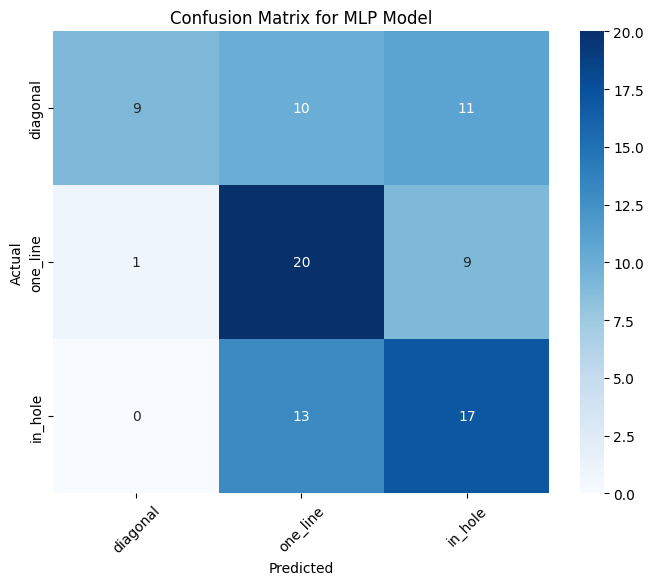

In [116]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labellist, yticklabels=labellist)
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Model')
plt.show()

In [ ]:
pd.DataFrame(y_train).reset_index().drop('index',axis=1)

In [106]:
dis_table=pd.concat((pd.DataFrame(X_train),pd.DataFrame(y_train).reset_index().drop('index',axis=1)),axis=1,ignore_index=True)
dis_table = dis_table.rename(columns={dis_table.columns[-1]: 'label'})

plot_table=pd.concat((pd.DataFrame(X_train_bkpc).reset_index().drop('index',axis=1),pd.DataFrame(y_train).reset_index().drop('index',axis=1)),axis=1,ignore_index=True)
plot_table = plot_table.rename(columns={plot_table.columns[-1]: 'label'})


In [107]:
def find_distants(miss_label,targetdata,plot_target,real_label):
    # miss_label=0
    plt.figure(figsize=(12, 3))
    plt.plot(plot_target, label="Target Data", marker='o', linestyle='',markersize=1 , color='blue', alpha=0.5)
    # plt.scatter(np.arange(len(plot_target)), plot_target, label="Target Data", color='blue', alpha=0.3)
    ground_truth=dis_table[dis_table['label'] == miss_label].drop('label',axis=1)
    plot_table_temp=plot_table[plot_table['label'] == miss_label].drop('label',axis=1)

    distants=[float(np.linalg.norm(targetdata-(ground_truth.iloc[i].values))) for i in range(len(ground_truth)) ]
    min_dist_index = np.argmin(distants)
    closest_data = plot_table_temp.iloc[min_dist_index].values
    plt.plot(closest_data, label=f"Closest Wrong Data, label: {miss_label}",markersize=1, marker='x',linestyle='', color='red', alpha=0.5)
    # plt.scatter(np.arange(len(closest_data)), closest_data, label=f"Closest Wrong Data, label: {miss_label}", color='red', alpha=0.3)
    print(f"Minimum Distance to Wrong label {miss_label}: {min(distants)}")

    ground_truth=dis_table[dis_table['label'] == real_label].drop('label',axis=1)
    plot_table_temp=plot_table[plot_table['label'] == real_label].drop('label',axis=1)
    distants=[float(np.linalg.norm(targetdata-(ground_truth.iloc[i].values))) for i in range(len(ground_truth)) ]
    min_dist_index = np.argmin(distants)
    closest_data = plot_table_temp.iloc[min_dist_index].values
    plt.plot(closest_data, label=f"Closest Correct Data, label: {real_label}",markersize=1, marker='x', linestyle='',color='green', alpha=0.5)
    print(f"Minimum Distance to Correct label  {real_label}: {min(distants)}")
    # plt.scatter(np.arange(len(closest_data)), closest_data, label=f"Closest Correct Data, label: {real_label}", color='green', alpha=0.3)
    # if real:
    #     plt.plot(closest_data, label="Closest Correct Data", marker='x', linestyle='--', color='green',alpha=0.8)
    #     plt.title(f"Target Data vs Closest Data (Correct Label: {miss_label})")
    # else:
    #     plt.plot(closest_data, label="Closest Wrong Data", marker='x', linestyle='--', color='red',alpha=0.8)
    #     plt.title(f"Target Data vs Closest Data (Wrong Label: {miss_label})")
    plt.legend(markerscale=5)
    plt.title(f"Target Data vs Closest Data")
    plt.xlabel("Frequency domain")
    plt.ylabel("Value after fft")
    plt.show()
    

diagonal diagonal_1
diagonal_1 Accuracy: 100.00%
[0 0 0 0 0]
diagonal diagonal_2
diagonal_2 Accuracy: 0.00%
[1 1 1 1 1]
Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.2091443136728932
Minimum Distance to Correct label  0: 0.18709695529145048


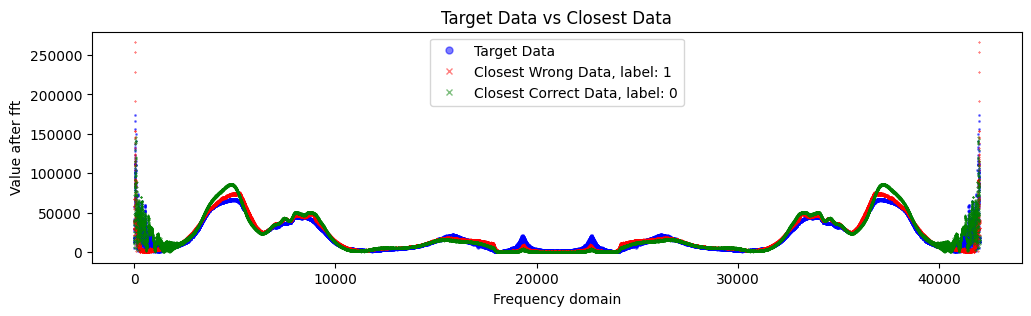

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.10098759854666549
Minimum Distance to Correct label  0: 0.10570497045185069


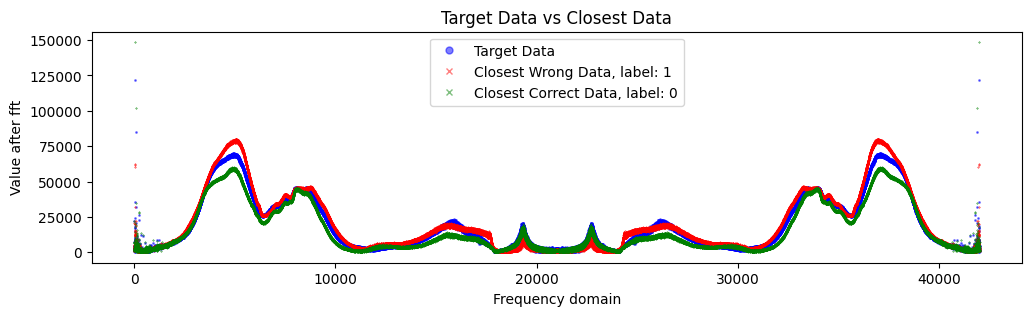

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.09866984807102817
Minimum Distance to Correct label  0: 0.10854806568150474


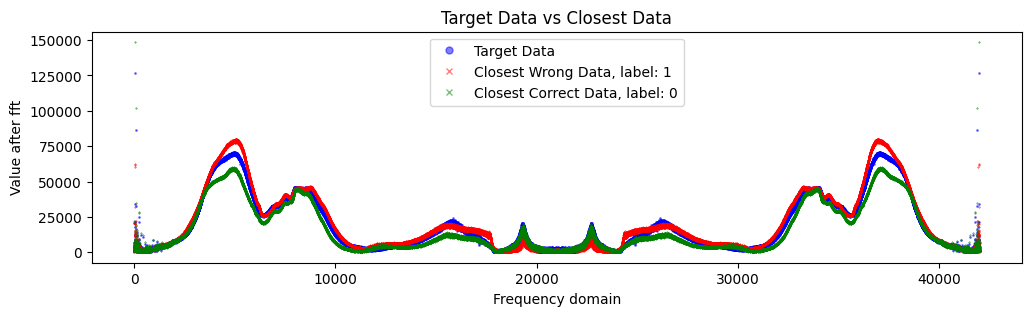

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.09619908589199562
Minimum Distance to Correct label  0: 0.10852651967628216


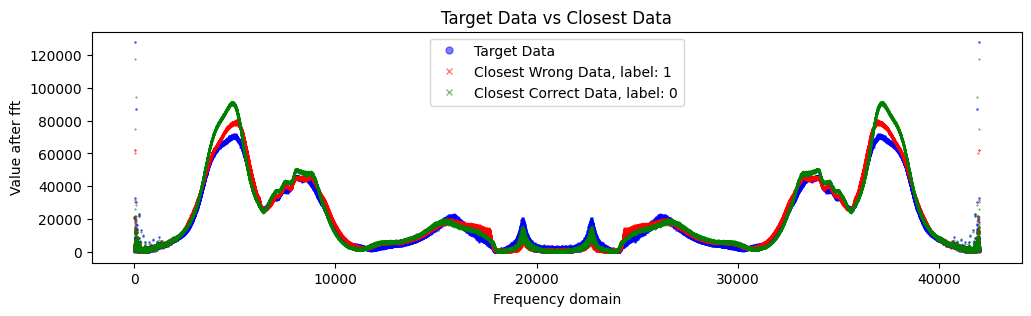

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.09456700339224802
Minimum Distance to Correct label  0: 0.1095804852515742


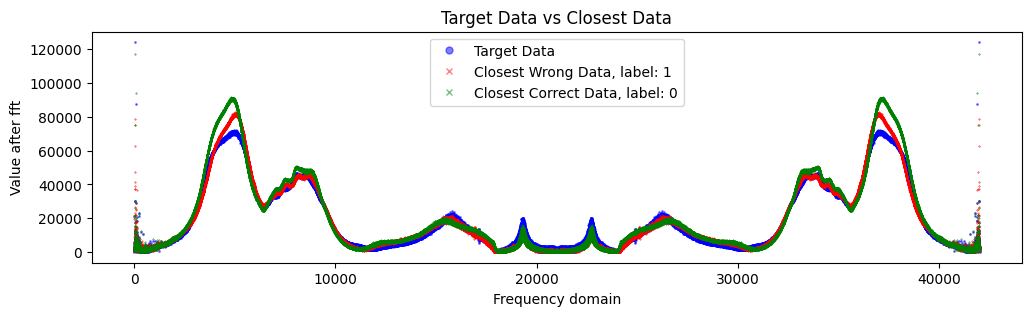

diagonal diagonal_3
diagonal_3 Accuracy: 0.00%
[1 1 1 2 2]
Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.22115062395130544
Minimum Distance to Correct label  0: 0.18939297946671427


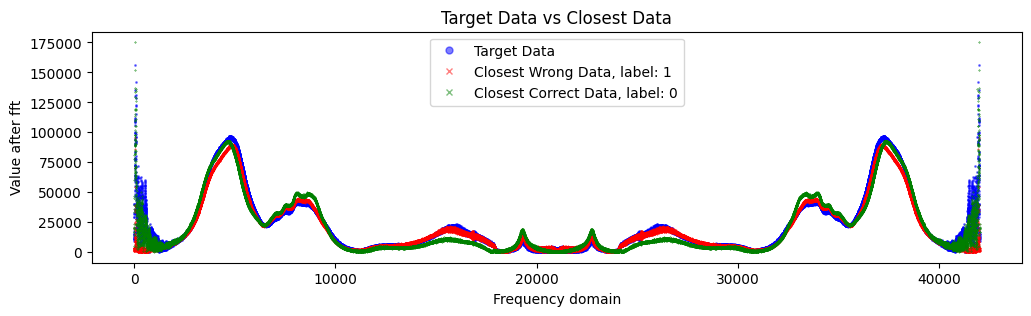

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.07732292376164433
Minimum Distance to Correct label  0: 0.12299784668592838


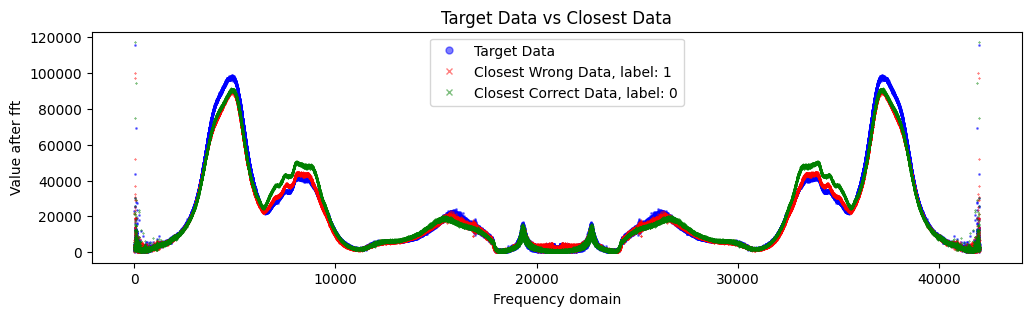

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.07982612444249798
Minimum Distance to Correct label  0: 0.12389162363206654


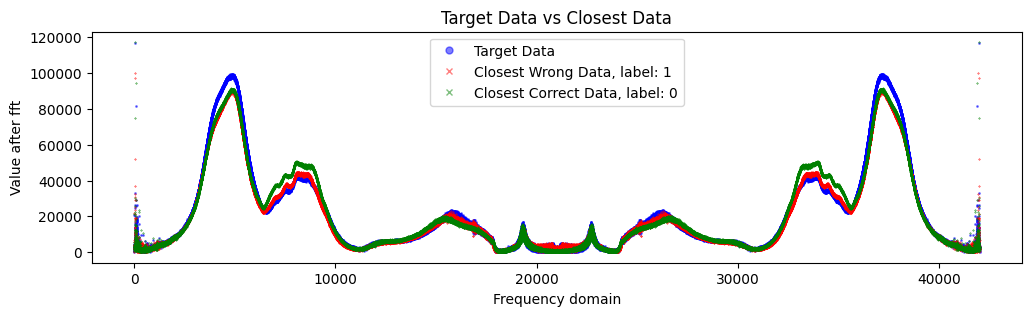

Wrong predict: Guess 2 but the real answer is 0
Minimum Distance to Wrong label 2: 0.07003942938161789
Minimum Distance to Correct label  0: 0.12390553204121309


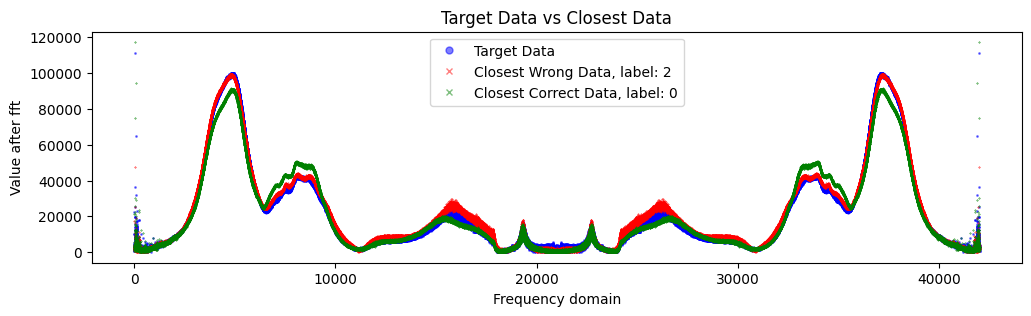

Wrong predict: Guess 2 but the real answer is 0
Minimum Distance to Wrong label 2: 0.07058653578934522
Minimum Distance to Correct label  0: 0.12396383209216374


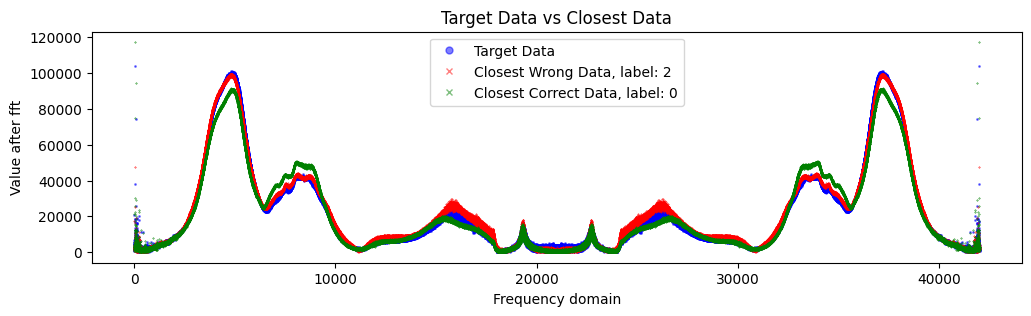

diagonal diagonal_4
diagonal_4 Accuracy: 100.00%
[0 0 0 0 0]
diagonal diagonal_5
diagonal_5 Accuracy: 0.00%
[1 1 1 1 1]
Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.1731335276501766
Minimum Distance to Correct label  0: 0.17438869916388675


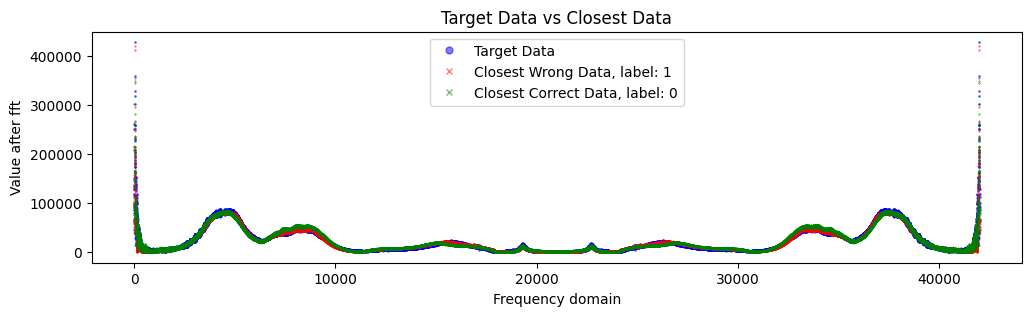

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.066742250420213
Minimum Distance to Correct label  0: 0.07875789574668697


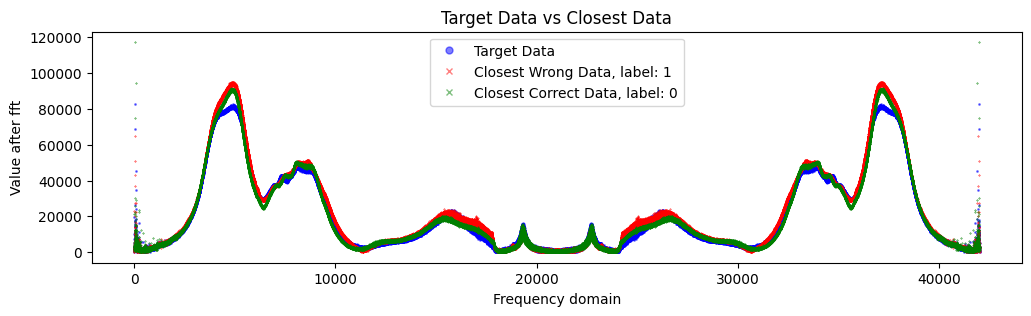

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.07000261818561185
Minimum Distance to Correct label  0: 0.08617136215515464


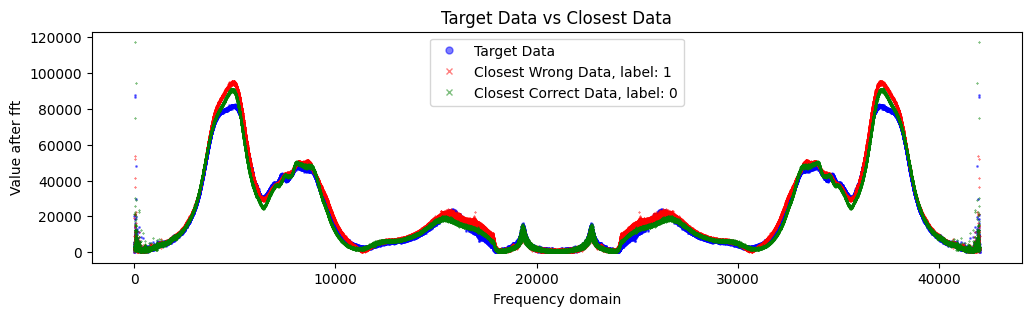

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.07106264386283699
Minimum Distance to Correct label  0: 0.09219934251833208


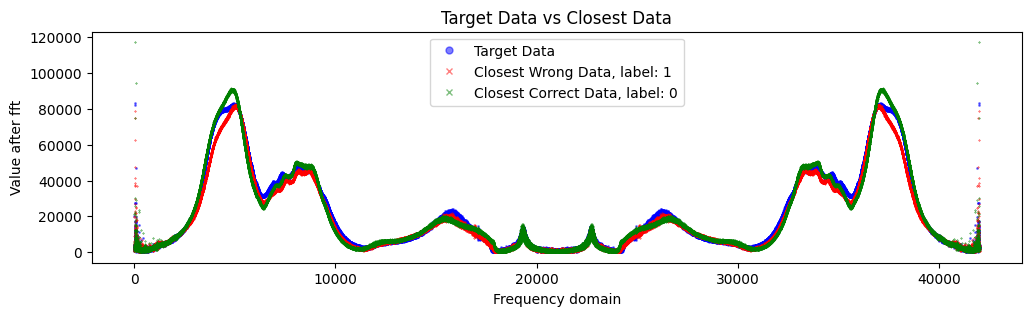

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.06881439674058641
Minimum Distance to Correct label  0: 0.09579048221394952


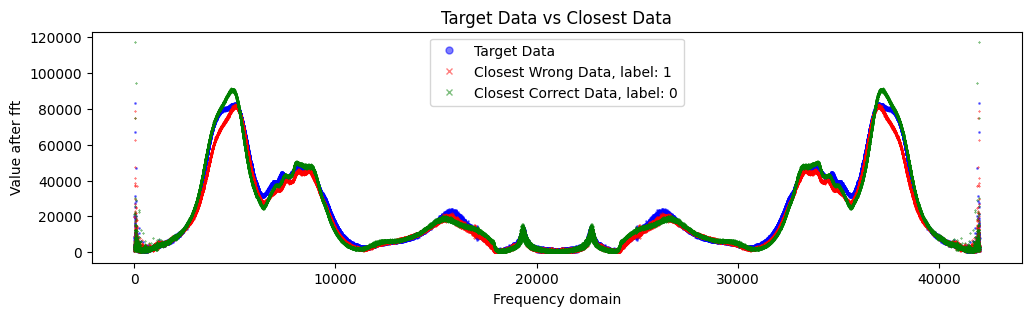

diagonal diagonal_6
diagonal_6 Accuracy: 20.00%
[0 1 1 1 1]
Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.10941447212345459
Minimum Distance to Correct label  0: 0.1307040901974703


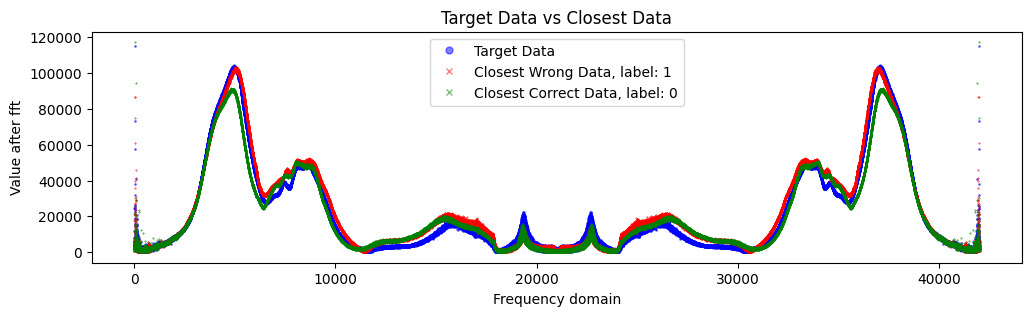

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.10553370941352197
Minimum Distance to Correct label  0: 0.13510852502316717


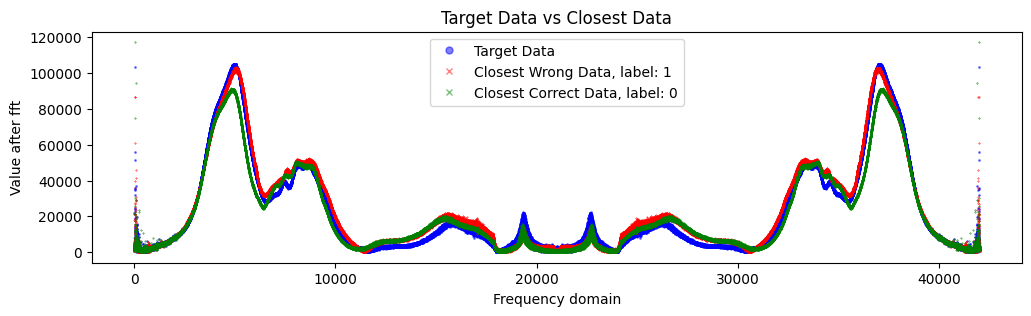

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.10280293113046257
Minimum Distance to Correct label  0: 0.13833530821794165


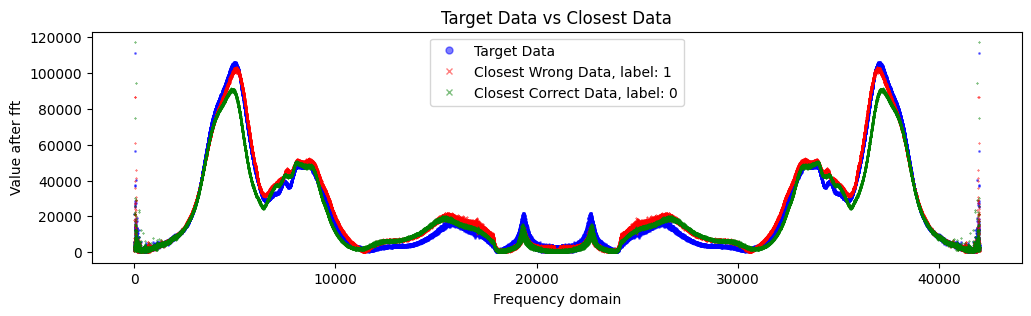

Wrong predict: Guess 1 but the real answer is 0
Minimum Distance to Wrong label 1: 0.10160089187194256
Minimum Distance to Correct label  0: 0.14124166800039795


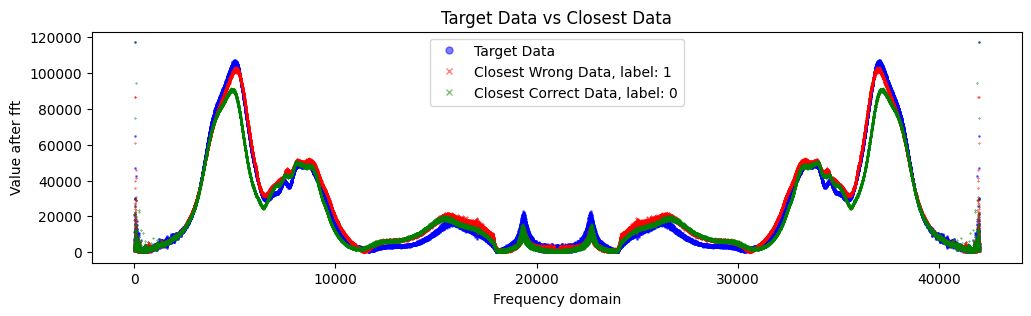

in_hole in_hole_1
in_hole_1 Accuracy: 100.00%
[2 2 2 2 2]
in_hole in_hole_2
in_hole_2 Accuracy: 100.00%
[2 2 2 2 2]
in_hole in_hole_3
in_hole_3 Accuracy: 100.00%
[2 2 2 2 2]
in_hole in_hole_4
in_hole_4 Accuracy: 100.00%
[2 2 2 2 2]
in_hole in_hole_5
in_hole_5 Accuracy: 100.00%
[2 2 2 2 2]
in_hole in_hole_6
in_hole_6 Accuracy: 100.00%
[2 2 2 2 2]
one_line one_line_1
one_line_1 Accuracy: 100.00%
[1 1 1 1 1]
one_line one_line_2
one_line_2 Accuracy: 20.00%
[1 2 2 2 2]
Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.2724713178281236
Minimum Distance to Correct label  1: 0.2168413827545581


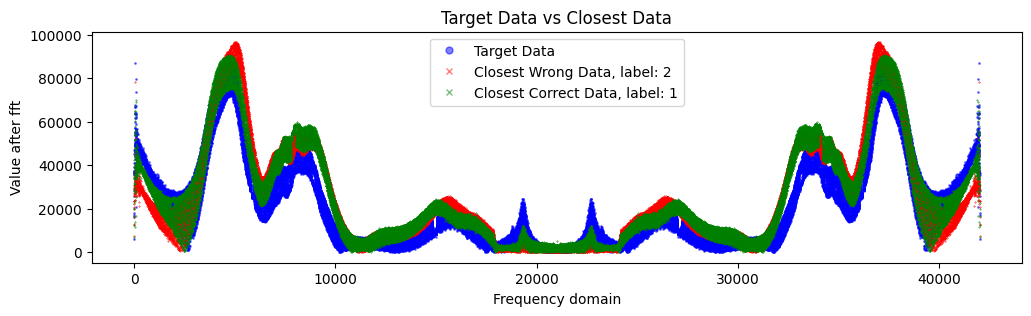

Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.09814778096306194
Minimum Distance to Correct label  1: 0.08526562938491841


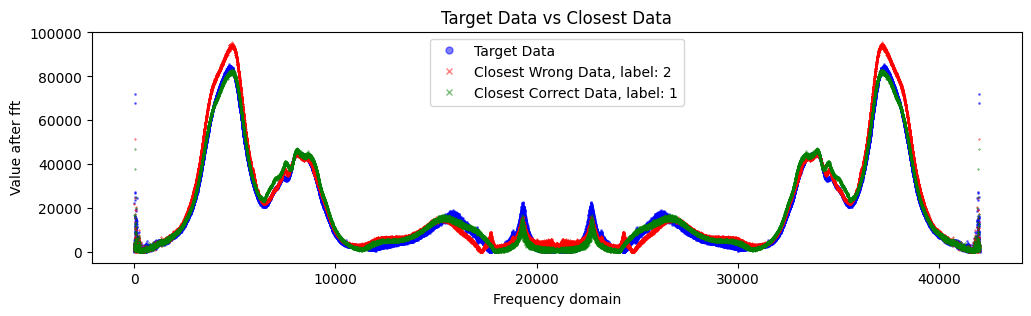

Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.09833742256359924
Minimum Distance to Correct label  1: 0.08320507025803311


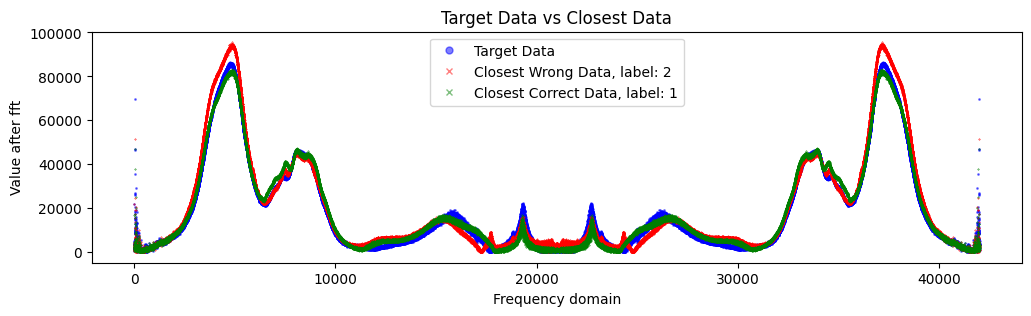

Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.10018559437358204
Minimum Distance to Correct label  1: 0.08212782771984703


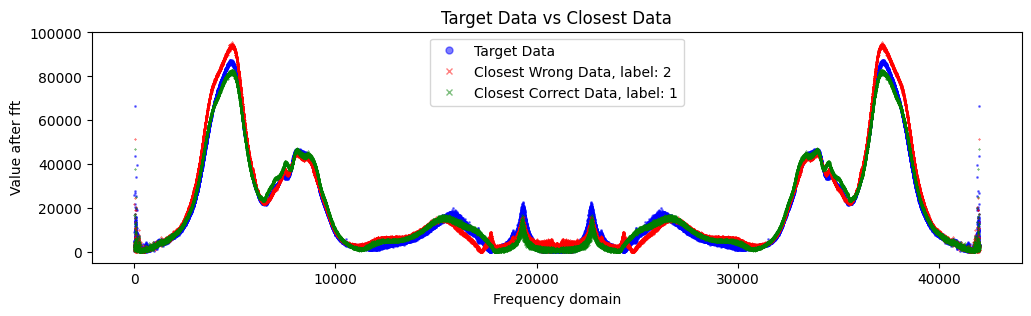

one_line one_line_3
one_line_3 Accuracy: 100.00%
[1 1 1 1 1]
one_line one_line_4
one_line_4 Accuracy: 80.00%
[1 1 2 1 1]
Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.07853603333505109
Minimum Distance to Correct label  1: 0.0698553196228197


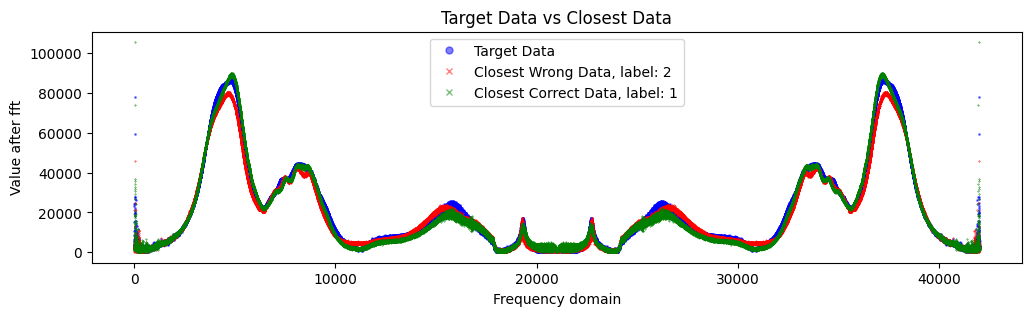

one_line one_line_5
one_line_5 Accuracy: 60.00%
[1 2 2 1 1]
Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.0697318922524896
Minimum Distance to Correct label  1: 0.07835293717960437


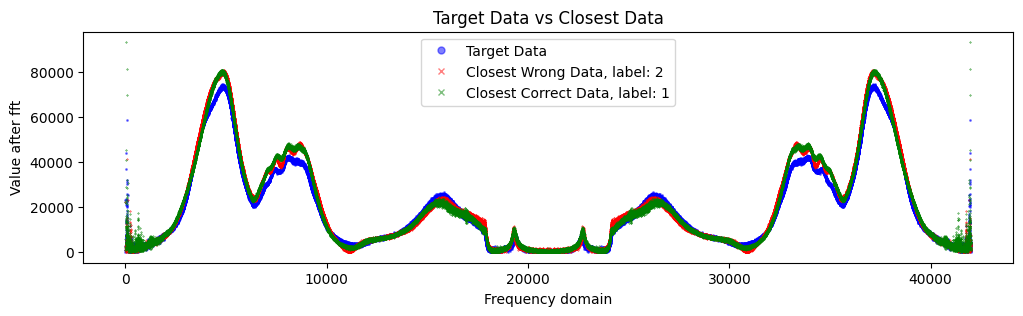

Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.06713759963734844
Minimum Distance to Correct label  1: 0.07829754785971535


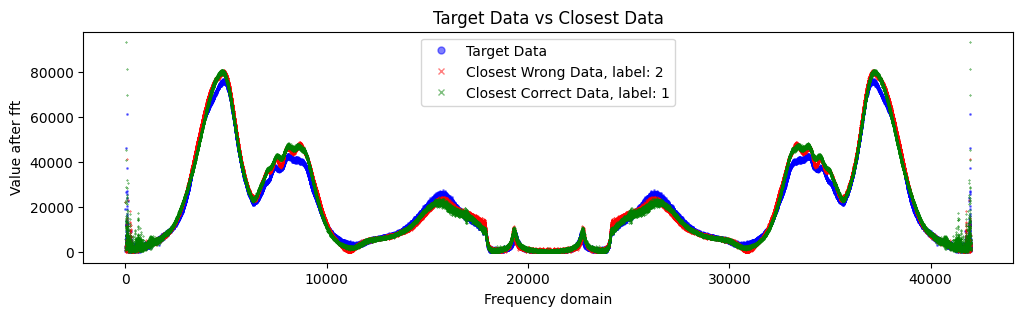

one_line one_line_6
one_line_6 Accuracy: 80.00%
[1 2 1 1 1]
Wrong predict: Guess 2 but the real answer is 1
Minimum Distance to Wrong label 2: 0.07138162483388195
Minimum Distance to Correct label  1: 0.10641001664554528


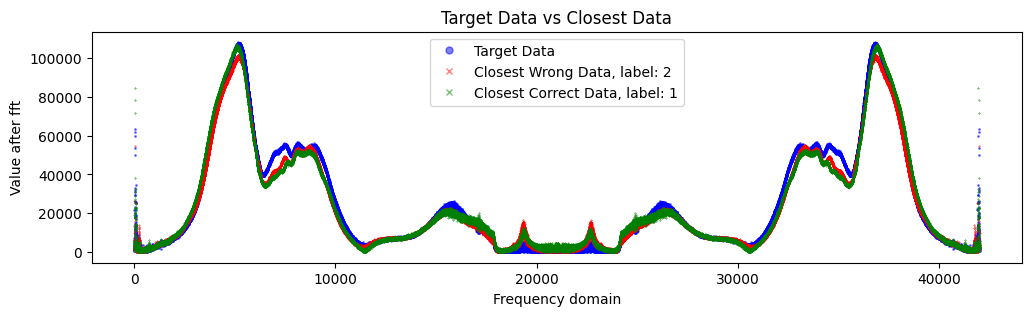

In [108]:
# test detail too see sppecific data is hard to reconize 
path_2="./data/jan_7_data_discretized/test_set/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i in name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  # df_temp.loc['label']=[create_regression(label,name) for _ in list(df_temp)]
  df_temp=df_temp.dropna(axis=0)
  df_temp = pd.concat([df_temp.iloc[:42000], df_temp.iloc[[-1]]], axis=0,ignore_index = True)
  df_temp=fft_self(df_temp)
  df_temp = df_temp.T
  singleX=df_temp.drop("label",axis=1)
  singleY=df_temp["label"].astype(int)
  X_test, y_test = singleX,singleY
  X_test = kpca.transform(X_test)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{name} Accuracy: {accuracy * 100:.2f}%")
  print(y_pred)
  print_data=pd.DataFrame(X_test).reset_index().drop('index',axis=1)
  for i in range(len(y_pred)):
    if(y_pred[i]!=y_test[i]):
      print(f"Wrong predict: Guess {y_pred[i]} but the real answer is { y_test[i]}")
      find_distants(y_pred[i],print_data.iloc[i].values,singleX.iloc[i].values,y_test[i])
      # find_distants(y_test[i],print_data.iloc[i].values,singleX.iloc[i].values,True)

In [310]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.11%


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)
# Create linear regression object
kernel_pca = KernelPCA(kernel='cosine')
kpca=kernel_pca.fit(X_train)
X_train=kpca.transform(X_train)
X_test = kpca.transform(X_test)
params = {
    "random_state":0,
    "n_estimators": 500,
    "max_depth": 5,
    # "min_samples_split": 5,
    "learning_rate": 0.01,
    # "loss": "squared_error",
}
regr =GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 score",r2)
y_test_c=(y_test/100).astype(int)
y_pred_c=(y_pred/100).astype(int)
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy: {accuracy * 100:.2f}%")

RMSE 23.659614441549337
MAE 13.642335719267216
R2 score 0.867351337553846
Accuracy: 61.11%


In [290]:
X_test, y_test = X2,y2
X_test = kpca.transform(X_test)
y_pred = regr.predict(X_test)
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 score",r2)

y_test_c=(y_test/100).astype(int)
y_pred_c=(y_pred/100).astype(int)
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy: {accuracy * 100:.2f}%")

RMSE 66.72970076696362
MAE 47.851801403517584
R2 score 0.07232229907322862
Accuracy: 41.11%


In [291]:

print("Classification Report:")
print(classification_report(y_test_c, y_pred_c, target_names=['diagonal','one_line','in_hole']))
temp=classification_report(y_test_c, y_pred_c, target_names=['diagonal','one_line','in_hole'], output_dict=True)
output=pd.DataFrame(temp)

Classification Report:
              precision    recall  f1-score   support

    diagonal       0.44      0.13      0.21        30
    one_line       0.34      0.83      0.49        30
     in_hole       1.00      0.27      0.42        30

    accuracy                           0.41        90
   macro avg       0.60      0.41      0.37        90
weighted avg       0.60      0.41      0.37        90



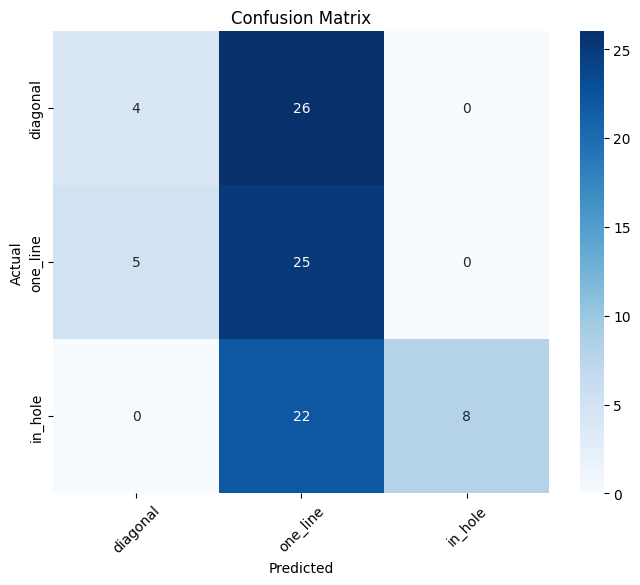

In [292]:
cm = confusion_matrix(y_test_c, y_pred_c)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['diagonal','one_line','in_hole'], yticklabels=['diagonal','one_line','in_hole'])
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# regression to classification test detail too see specific data is hard to reconize 
path_2="./data/jan_7_data_discretized/test_set/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if ('2' in name ): continue
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i in name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  # df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_temp.loc['label']=[create_regression(label,name) for _ in list(df_temp)]
  df_temp=df_temp.dropna(axis=0)
  df_temp = pd.concat([df_temp.iloc[:42000], df_temp.iloc[[-1]]], axis=0,ignore_index = True)
  df_temp=fft_self(df_temp)
  df_temp = df_temp.T
  singleX=df_temp.drop("label",axis=1)
  singleY=df_temp["label"].astype(int)
  X_test, y_test = singleX,singleY
  X_test = kpca.transform(X_test)
  y_pred = regr.predict(X_test)
  r2 = r2_score(y_test,y_pred)
  y_test_c=(y_test/100).astype(int)
  y_pred_c=(y_pred/100).astype(int)
  accuracy = accuracy_score(y_test_c, y_pred_c)
  print(f"{name} Accuracy: {accuracy * 100:.2f}%")

diagonal_1 diagonal_1
diagonal_1 Accuracy: 53.33%
diagonal_2 diagonal_2
diagonal_2 Accuracy: 66.67%
diagonal_3 diagonal_3
diagonal_3 Accuracy: 13.33%
in_hole_1 in_hole_1
in_hole_1 Accuracy: 53.33%
in_hole_2 in_hole_2
in_hole_2 Accuracy: 60.00%
in_hole_3 in_hole_3
in_hole_3 Accuracy: 46.67%
one_line_1 one_line_1
one_line_1 Accuracy: 100.00%
one_line_2 one_line_2
one_line_2 Accuracy: 100.00%
one_line_3 one_line_3
one_line_3 Accuracy: 93.33%


In [ ]:
output.T.to_csv('contact_withoutPoint_train_11_04_test_11_04_after_fft.csv')

In [ ]:
import pickle
pickle.dump(clf, open("MLP_train_01_06", 'wb'))
pickle.dump(kpca, open("KPCA_train_01_06", 'wb'))

In [ ]:
my_model_clf = pickle.load(open("Knn_train_11_01", 'rb'))
result_score = my_model_clf.score(X_test,y_test)
print("Score: ",result_score)

Score:  0.8777777777777778


In [ ]:
X.shape

(500, 42000)

In [ ]:
X_test.shape

(50, 449)

In [ ]:
X_train.shape

(450, 449)